In [3]:
import pandas as pd

pbp_data = pd.read_csv('data/pbp/2018.csv', sep=",", encoding='iso-8859-1')
pbp_data.append(pd.read_csv('data/pbp/2017.csv', sep=",", encoding='iso-8859-1'))
pbp_data.append(pd.read_csv('data/pbp/2016.csv', sep=",", encoding='iso-8859-1'))
pbp_data.id.nunique()

153544

In [4]:
pbp_data.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,drive_id,period,clock.minutes,clock.seconds,yard_line,down,distance,yards_gained,play_type,play_text
0,401012246101867401,Alabama,SEC,Louisville,ACC,Alabama,Louisville,0,0,4010122461,1,13,25,46,1,10,7,Pass Reception,Tua Tagovailoa pass complete to Irv Smith Jr. ...
1,401012246101884401,Alabama,SEC,Louisville,ACC,Alabama,Louisville,7,0,4010122461,1,11,55,89,2,2,11,Passing Touchdown,Tua Tagovailoa pass complete to Jerry Jeudy fo...
2,401012246101849902,Louisville,ACC,Alabama,SEC,Alabama,Louisville,0,0,4010122461,1,15,0,65,1,10,0,Kickoff,Evan O'Hara kickoff for 58 yds
3,401012246101874901,Alabama,SEC,Louisville,ACC,Alabama,Louisville,0,0,4010122461,1,12,50,53,2,3,28,Pass Reception,Tua Tagovailoa pass complete to DeVonta Smith ...
4,401012246101858901,Alabama,SEC,Louisville,ACC,Alabama,Louisville,0,0,4010122461,1,14,10,38,2,7,-6,Sack,Tua Tagovailoa sacked by G.G. Robinson for a l...


In [5]:
non_garbage_time_data = pbp_data[
    pbp_data.down != 0
]
non_garbage_time_data.id.nunique()

150393

In [6]:
garbage_time_data = non_garbage_time_data[
    ((abs(non_garbage_time_data.offense_score - non_garbage_time_data.defense_score) >= 38) & (non_garbage_time_data.period == 2))
    | ((abs(non_garbage_time_data.offense_score - non_garbage_time_data.defense_score) >= 28) & (non_garbage_time_data.period == 3))
    | ((abs(non_garbage_time_data.offense_score - non_garbage_time_data.defense_score) >= 22) & (non_garbage_time_data.period == 4))
]

print(non_garbage_time_data.id.nunique())
print(garbage_time_data.id.nunique())

non_garbage_time_data.drop(garbage_time_data.index, inplace=True)
print(non_garbage_time_data.id.nunique())

150393
17531
132862


/Users/akeaswaran/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
downs = [1, 2, 3, 4]
for d in downs:
    intermed = non_garbage_time_data[
        non_garbage_time_data.down == d
    ]
    print(f"number of instances of down {d}: {intermed.id.nunique()} ({100 * intermed.id.nunique() / non_garbage_time_data.id.nunique()}%)")

number of instances of down 1: 56156 (42.266411765591364%)
number of instances of down 2: 37622 (28.316599178094563%)
number of instances of down 3: 24758 (18.63437250681158%)
number of instances of down 4: 14323 (10.78035856753624%)


In [8]:
drive_data = pd.read_json('data/drives/2018.json')
drive_data.append(pd.read_csv('data/drives/2017.csv', sep=",", encoding='iso-8859-1'))
drive_data.append(pd.read_csv('data/drives/2016.csv', sep=",", encoding='iso-8859-1'))
drive_data.head()

/Users/akeaswaran/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,defense,defense_conference,drive_result,elapsed,end_period,end_time,end_yardline,game_id,id,offense,offense_conference,plays,scoring,start_period,start_time,start_yardline,yards
0,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65
1,Alabama,SEC,PUNT,"{'minutes': 1, 'seconds': 45}",1,"{'minutes': 10, 'seconds': 10}",55,401012246,4010122462,Louisville,ACC,4,False,1,"{'minutes': 11, 'seconds': 55}",75,20
2,Louisville,ACC,FUMBLE,"{'minutes': 3, 'seconds': 6}",1,"{'minutes': 7, 'seconds': 4}",65,401012246,4010122463,Alabama,SEC,8,False,1,"{'minutes': 10, 'seconds': 10}",20,63
3,Alabama,SEC,PUNT,{'minutes': 1},1,"{'minutes': 6, 'seconds': 4}",84,401012246,4010122464,Louisville,ACC,3,False,1,"{'minutes': 7, 'seconds': 4}",83,-1
4,Louisville,ACC,TD,{'minutes': 2},1,"{'minutes': 4, 'seconds': 4}",100,401012246,4010122465,Alabama,SEC,6,True,1,"{'minutes': 6, 'seconds': 4}",45,55


In [9]:
# drive_data.drive_result.value_counts(normalize=True)
# cleaned_yards = drive_data.start_yardline.apply(lambda x: x % 50)
drive_data.start_yardline.value_counts(bins=[0,10,20,30,40,50])

(20.0, 30.0]      4358
(10.0, 20.0]      1984
(30.0, 40.0]      1961
(40.0, 50.0]      1362
(-0.001, 10.0]     975
Name: start_yardline, dtype: int64

In [10]:
new_df = pd.merge(drive_data,
                 non_garbage_time_data[['drive_id','away','home']],
                 left_on='id',
                 right_on='drive_id')

new_df.loc[
    new_df.offense == new_df.away, ['start_yardline']
] = 100 - new_df.start_yardline
new_df.loc[
    new_df.offense == new_df.away, ['end_yardline']
] = 100 - new_df.end_yardline
new_df.head()

,defense,defense_conference,drive_result,elapsed,end_period,end_time,end_yardline,game_id,id,offense,offense_conference,plays,scoring,start_period,start_time,start_yardline,yards,drive_id,away,home
0,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
1,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
2,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
3,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
4,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama


Text(0, 0.5, 'Density')

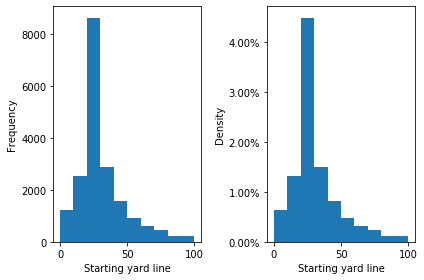

In [11]:
%matplotlib inline
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

coll_df = new_df.drop_duplicates(subset='id')
coll_df.head()

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(coll_df.start_yardline, bins=10)

# # We can also normalize our inputs by the total number of counts
axs[1].hist(coll_df.start_yardline, bins=10, density=True)

# # Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

axs[0].set_xlabel('Starting yard line')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Starting yard line')
axs[1].set_ylabel('Density')

In [12]:
coll_df.start_yardline.value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100])

(20.0, 30.0]      7968
(10.0, 20.0]      3374
(30.0, 40.0]      2700
(-0.001, 10.0]    1479
(40.0, 50.0]      1437
(50.0, 60.0]       875
(60.0, 70.0]       545
(70.0, 80.0]       449
(80.0, 90.0]       198
(90.0, 100.0]      190
Name: start_yardline, dtype: int64

In [13]:
coll_df.drive_result.value_counts()

PUNT                  7262
TD                    5266
FG                    1640
INT                   1114
DOWNS                 1002
FUMBLE                 858
MISSED FG              608
END OF HALF            601
END OF GAME            302
Uncategorized          190
INT TD                 114
FUMBLE TD               72
SF                      57
PUNT TD                 43
PUNT RETURN TD          40
END OF 4TH QUARTER      25
FUMBLE RETURN TD         9
MISSED FG TD             8
DOWNS TD                 2
KICKOFF                  2
Name: drive_result, dtype: int64

In [14]:
scoring_drives = coll_df[
    (coll_df.drive_result == 'TD') | (coll_df.drive_result == 'FG')
]
scoring_drives.id.nunique()

6906

In [15]:
cust_bins = np.linspace(1,100,100)
cust_bins

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [16]:
# Probability of an offensive TD drive given starting yard line within one of these bins
def prob(prb1, prb2):
    return prb1 / prb2

td = coll_df[
    (coll_df.drive_result == 'TD')
].start_yardline.value_counts(bins=cust_bins)
td_vars = pd.DataFrame({'yardline_bin':td.index, 'td_frequency':td.values})
td_vars['td_density'] = td_vars.td_frequency / coll_df.id.nunique()
td_vars

,yardline_bin,td_frequency,td_density
0,"(24.0, 25.0]",1114,0.057976
1,"(19.0, 20.0]",258,0.013427
2,"(34.0, 35.0]",154,0.008015
3,"(29.0, 30.0]",126,0.006557
4,"(25.0, 26.0]",97,0.005048
5,"(20.0, 21.0]",97,0.005048
6,"(30.0, 31.0]",93,0.004840
7,"(23.0, 24.0]",92,0.004788
8,"(26.0, 27.0]",88,0.004580
9,"(22.0, 23.0]",85,0.004424


In [17]:
# Probability of an offensive FG drive given starting yard line within one of these bins
fg = coll_df[
    (coll_df.drive_result == 'FG')
].start_yardline.value_counts(bins=cust_bins)
fg_vars = pd.DataFrame({'yardline_bin':fg.index, 'fg_frequency':fg.values})
fg_vars['fg_density'] = fg_vars.fg_frequency / coll_df.id.nunique()
fg_vars

,yardline_bin,fg_frequency,fg_density
0,"(24.0, 25.0]",340,0.017695
1,"(19.0, 20.0]",77,0.004007
2,"(34.0, 35.0]",47,0.002446
3,"(44.0, 45.0]",33,0.001717
4,"(29.0, 30.0]",32,0.001665
5,"(23.0, 24.0]",32,0.001665
6,"(28.0, 29.0]",31,0.001613
7,"(25.0, 26.0]",31,0.001613
8,"(31.0, 32.0]",26,0.001353
9,"(35.0, 36.0]",25,0.001301


In [18]:
combined = pd.merge(td_vars, fg_vars, on='yardline_bin')
combined
# combined now contains % of scoring AND position

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density
0,"(24.0, 25.0]",1114,0.057976,340,0.017695
1,"(19.0, 20.0]",258,0.013427,77,0.004007
2,"(34.0, 35.0]",154,0.008015,47,0.002446
3,"(29.0, 30.0]",126,0.006557,32,0.001665
4,"(25.0, 26.0]",97,0.005048,31,0.001613
5,"(20.0, 21.0]",97,0.005048,14,0.000729
6,"(30.0, 31.0]",93,0.004840,14,0.000729
7,"(23.0, 24.0]",92,0.004788,32,0.001665
8,"(26.0, 27.0]",88,0.004580,21,0.001093
9,"(22.0, 23.0]",85,0.004424,21,0.001093


In [19]:
# generating prob of a specific yard line bin
pos = coll_df.start_yardline.value_counts(bins=cust_bins, normalize=True)
p_pos = pd.DataFrame({'yardline_bin':pos.index, 'yardline_density':pos.values})

p_pos

,yardline_bin,yardline_density
0,"(24.0, 25.0]",0.246682
1,"(19.0, 20.0]",0.056987
2,"(34.0, 35.0]",0.026802
3,"(29.0, 30.0]",0.022014
4,"(25.0, 26.0]",0.019620
5,"(20.0, 21.0]",0.018996
6,"(23.0, 24.0]",0.018891
7,"(22.0, 23.0]",0.018475
8,"(27.0, 28.0]",0.018007
9,"(21.0, 22.0]",0.018007


In [20]:
combined = pd.merge(combined, p_pos, on='yardline_bin')
combined

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,yardline_density
0,"(24.0, 25.0]",1114,0.057976,340,0.017695,0.246682
1,"(19.0, 20.0]",258,0.013427,77,0.004007,0.056987
2,"(34.0, 35.0]",154,0.008015,47,0.002446,0.026802
3,"(29.0, 30.0]",126,0.006557,32,0.001665,0.022014
4,"(25.0, 26.0]",97,0.005048,31,0.001613,0.019620
5,"(20.0, 21.0]",97,0.005048,14,0.000729,0.018996
6,"(30.0, 31.0]",93,0.004840,14,0.000729,0.014832
7,"(23.0, 24.0]",92,0.004788,32,0.001665,0.018891
8,"(26.0, 27.0]",88,0.004580,21,0.001093,0.016654
9,"(22.0, 23.0]",85,0.004424,21,0.001093,0.018475


In [21]:
def conditional_prob(score_pos_prob, yd_prob):
    return score_pos_prob / yd_prob

combined['p_td_given_pos'] = np.vectorize(conditional_prob)(combined['td_density'], combined['yardline_density'])
combined['p_fg_given_pos'] = np.vectorize(conditional_prob)(combined['fg_density'], combined['yardline_density'])

def weighted_epa(td, fg):
    return 7 * td + 3 * fg

combined['ep'] = np.vectorize(weighted_epa)(combined['p_td_given_pos'], combined['p_fg_given_pos'])
combined['yardline'] = combined.yardline_bin.apply(lambda x: x.left)
combined


,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,yardline_density,p_td_given_pos,p_fg_given_pos,ep,yardline
0,"(24.0, 25.0]",1114,0.057976,340,0.017695,0.246682,0.235021,0.071730,1.860338,24.0
1,"(19.0, 20.0]",258,0.013427,77,0.004007,0.056987,0.235616,0.070320,1.860274,19.0
2,"(34.0, 35.0]",154,0.008015,47,0.002446,0.026802,0.299029,0.091262,2.366990,34.0
3,"(29.0, 30.0]",126,0.006557,32,0.001665,0.022014,0.297872,0.075650,2.312057,29.0
4,"(25.0, 26.0]",97,0.005048,31,0.001613,0.019620,0.257294,0.082228,2.047745,25.0
5,"(20.0, 21.0]",97,0.005048,14,0.000729,0.018996,0.265753,0.038356,1.975342,20.0
6,"(30.0, 31.0]",93,0.004840,14,0.000729,0.014832,0.326316,0.049123,2.431579,30.0
7,"(23.0, 24.0]",92,0.004788,32,0.001665,0.018891,0.253444,0.088154,2.038567,23.0
8,"(26.0, 27.0]",88,0.004580,21,0.001093,0.016654,0.275000,0.065625,2.121875,26.0
9,"(22.0, 23.0]",85,0.004424,21,0.001093,0.018475,0.239437,0.059155,1.853521,22.0


Linear Regression: y = 0.04492x + 0.86375
Regression Coefficients: [0.         0.01419829 0.00030724]
MSE: 1.4335
Polynomial Regression (with degree 2): y = 0.00000x^3 + 0.01420x^2 + 0.00031x + 1.38094
Regression Coefficients: [ 0.00000000e+00  5.54503835e-02 -7.18900496e-04  6.84094953e-06]
MSE: 1.4650
Polynomial Regression (with degree 3): y = 0.0000000x^4 + 0.0554504x^3 + -0.00072x^2 + 0.0000068x + 1.0285636
Regression Coefficients: [ 0.00000000e+00  1.91087413e-02  8.97381370e-04 -1.82164124e-05
  1.25287171e-07]
MSE: 1.4838
Polynomial Regression (with degree 4): y = 0.0000000x^5 + 0.0191087x^4 + 0.0008974x^3 + -0.00002x^2 + 0.0000001x + 1.2184748
Regression Coefficients: [ 0.00000000e+00  5.08554534e-02 -1.28044428e-03  3.94154471e-05
 -5.21409994e-07  2.58679956e-09]
MSE: 1.4990
Polynomial Regression (with degree 5): y = 0.0000000x^6 + 0.0508555x^5 + 0.0008974x^4 + 0.0000394x^3 + -0.00000x^2 + 0.0000000x + 1.1052042


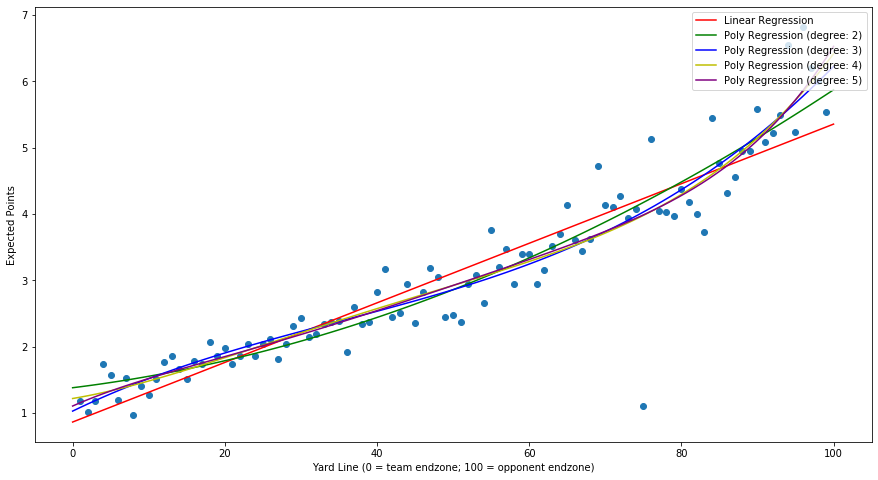

In [22]:
f, ax = plt.subplots(figsize=(15,8))
combined.sort_values(by=["yardline"])
ax.scatter(combined.yardline, combined.ep);
ax.set_xlabel("Yard Line (0 = team endzone; 100 = opponent endzone)")
ax.set_ylabel("Expected Points");

# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(combined.yardline[:, np.newaxis], combined.ep)
xfit = np.linspace(0, 100, 99)
yfit = model.predict(xfit[:, np.newaxis])
ax.plot(xfit, yfit, color='red', label='Linear Regression');
print(f'Linear Regression: y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}')

# Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
def poly_regress(degree, plot, color):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(combined.yardline[:, np.newaxis])
    X_test_ = poly.fit_transform(xfit[:, np.newaxis])

    lg = LinearRegression()

    # Fit
    lg.fit(X_, combined.ep)

    # Obtain coefficients
    # lg.coef_

    quady_fit = lg.predict(X_test_)

    plot.plot(xfit, quady_fit, color=color, label=f'Poly Regression (degree: {degree})')
    print(f'Regression Coefficients: {lg.coef_}')
    error = mean_squared_error(combined.ep[:, np.newaxis], quady_fit)
    print(f'MSE: {error:.4f}')
    return lg

quad1 = poly_regress(2, ax, 'g')
print(f'Polynomial Regression (with degree 2): y = {quad1.coef_[0]:.5f}x^3 + {quad1.coef_[1]:.5f}x^2 + {quad1.coef_[2]:.5f}x + {quad1.intercept_:.5f}')

quad2 = poly_regress(3, ax, 'b')
print(f'Polynomial Regression (with degree 3): y = {quad2.coef_[0]:.7f}x^4 + {quad2.coef_[1]:.7f}x^3 + {quad2.coef_[2]:.5f}x^2 + {quad2.coef_[3]:.7f}x + {quad2.intercept_:.7f}')

quad3 = poly_regress(4, ax, 'y')
print(f'Polynomial Regression (with degree 4): y = {quad3.coef_[0]:.7f}x^5 + {quad3.coef_[1]:.7f}x^4 + {quad3.coef_[2]:.7f}x^3 + {quad3.coef_[3]:.5f}x^2 + {quad3.coef_[4]:.7f}x + {quad3.intercept_:.7f}')

quad4 = poly_regress(5, ax, 'purple')
print(f'Polynomial Regression (with degree 5): y = {quad4.coef_[0]:.7f}x^6 + {quad4.coef_[1]:.7f}x^5 + {quad3.coef_[2]:.7f}x^4 + {quad4.coef_[3]:.7f}x^3 + {quad4.coef_[4]:.5f}x^2 + {quad4.coef_[5]:.7f}x + {quad4.intercept_:.7f}');

ax.legend(loc='upper right');

In [23]:
# Testing 

modern_drive_data = pd.read_json('data/drives/2019.json')
# modern_data.head()

cleaned_modern_pbp_data = pd.read_json('data/pbp/2019.json')

cleaned_modern_pbp_data = cleaned_modern_pbp_data[
    cleaned_modern_pbp_data.down != 0
]

cleaned_modern_pbp_data = cleaned_modern_pbp_data[
    abs(cleaned_modern_pbp_data.offense_score - cleaned_modern_pbp_data.defense_score) <= 20
]
# cleaned_pbp_data.id.nunique()

verify_results = pd.merge(modern_drive_data[["id","game_id","start_yardline","end_yardline","drive_result","offense","defense"]],
                 cleaned_modern_pbp_data[['drive_id','away','home']],
                 left_on='id',
                 right_on='drive_id')

verify_results.loc[
    verify_results.offense == verify_results.away, ['start_yardline']
] = 100 - verify_results.start_yardline
verify_results.loc[
    verify_results.offense == verify_results.away, ['end_yardline']
] = 100 - verify_results.end_yardline

yardlines = verify_results.start_yardline
test_input = np.random.choice(a=verify_results.start_yardline, size=99)

test_dataset = pd.DataFrame({'yardline':test_input})

test_dataset['quad0_ep_prediction'] = model.predict(test_dataset.yardline[:, np.newaxis])
# test_dataset['quad0_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad0_ep_prediction'])
test_dataset.head()

yardline_quad1 = PolynomialFeatures(degree=2).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad1_ep_prediction'] = quad1.predict(yardline_quad1)
# test_dataset['quad1_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad1_ep_prediction'])
test_dataset.head()

yardline_quad2 = PolynomialFeatures(degree=3).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad2_ep_prediction'] = quad2.predict(yardline_quad2)
# test_dataset['quad2_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad2_ep_prediction'])
test_dataset.head()

yardline_quad3 = PolynomialFeatures(degree=4).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad3_ep_prediction'] = quad3.predict(yardline_quad3)
# test_dataset['quad3_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad3_ep_prediction'])
test_dataset.head()

yardline_quad4 = PolynomialFeatures(degree=5).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad4_ep_prediction'] = quad4.predict(yardline_quad4)
# test_dataset['quad4_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad4_ep_prediction'])
test_dataset.head()

,yardline,quad0_ep_prediction,quad1_ep_prediction,quad2_ep_prediction,quad3_ep_prediction,quad4_ep_prediction
0,25,1.986807,1.927919,2.072400,2.021366,2.013765
1,8,1.223128,1.514186,1.429660,1.419964,1.448229
2,35,2.436030,2.254246,2.381980,2.393553,2.359961
3,26,2.031730,1.957786,2.104533,2.059013,2.047094
4,25,1.986807,1.927919,2.072400,2.021366,2.013765


In [27]:
import numpy as np
generated_yardlines = np.linspace(0, 100, 101)
generated_yardlines

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [28]:
csv_dump_frame = pd.DataFrame({'yardline':generated_yardlines})
csv_yardline_quad2 = PolynomialFeatures(degree=3).fit_transform(csv_dump_frame.yardline[:, np.newaxis])
csv_dump_frame['ep'] = quad2.predict(csv_yardline_quad2)
csv_dump_frame.head()

,yardline,ep
0,0.0,1.028564
1,1.0,1.083302
2,2.0,1.136644
3,3.0,1.188629
4,4.0,1.239301


In [29]:
csv_dump_frame.to_csv('results/ep.csv', index=False)